In [1]:
from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


https://analyticsindiamag.com/step-by-step-guide-to-audio-visualization-in-python/

In [2]:
# !pip install librosa

In [3]:
import librosa
import librosa.display as ldp
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default `sr=22050`).
    
    To preserve the native sampling rate of the file, use `sr=None`.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
    sr   : number > 0 [scalar]
        target sampling rate
    
        'None' uses the native sampling rate
    
    mono : bool
        convert si

In [7]:
file = 'One Hour 3rd Eye Awakening Isochroni.mp3'

# dp.Audio(file)

In [9]:
file = 'One Hour 3rd Eye Awakening Isochroni.mp3'
data,sample_rate = librosa.load(file, duration=10)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning:

PySoundFile failed. Trying audioread instead.



In [10]:
sample_rate

22050

In [11]:
dp.Audio(data=data,rate=sample_rate)

In [13]:
len(data)/sample_rate

10.0

In [14]:
nsec = int(len(data)/sample_rate)

sec = np.linspace(0,nsec,sample_rate*nsec)
sec.shape

(220500,)

In [15]:
df = pd.DataFrame({'Sec':sec,'Audio':data})
# df['Sec'] = pd.to_datetime()

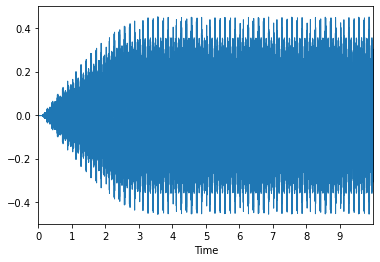

In [16]:
librosa.display.waveplot(data,sr=sample_rate, max_points=50000.0,x_axis='time')

# help(librosa.display.waveplot)

[(0.0, 10.0)]

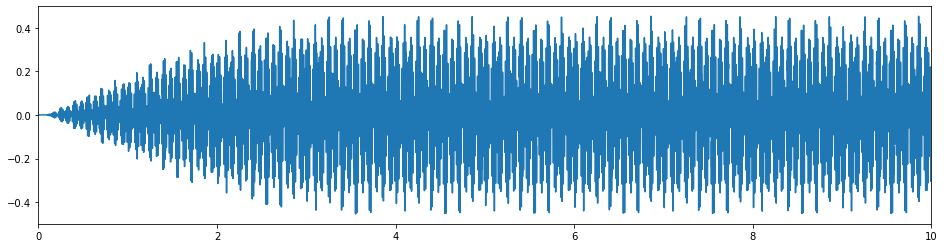

In [17]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(sec,data)
ax.set(xlim=(0,10))

In [18]:
len(data)

220500

## Spectograms - MATPLOTLIB

(0.0, 1000.0)

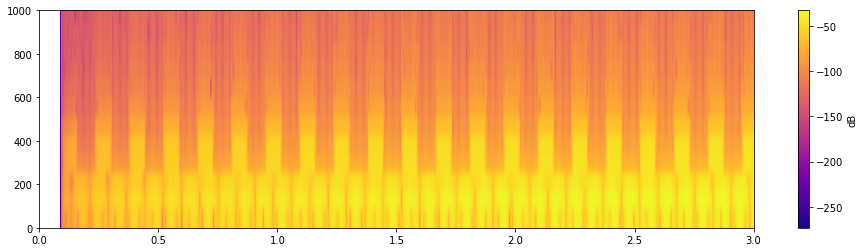

In [20]:
## With matplotlib
fig, ax = plt.subplots(figsize=(16,4))
spec, freqs, t, m  = plt.specgram(data,scale='dB',#noverlap=128,
                                  Fs=sample_rate,NFFT=256,mode='psd',
                                  cmap='plasma',)
c =plt.colorbar(label='dB')
ax.set_xlim(0,3)
ax.set_ylim(0,1000)

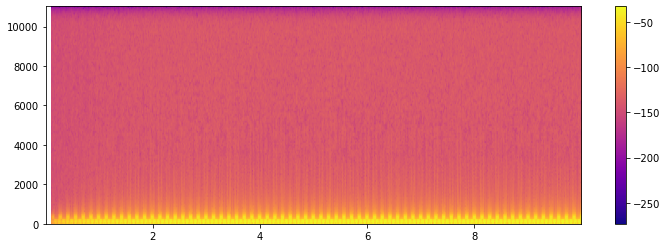

In [21]:
## Limiting cmap
fig, ax = plt.subplots(figsize=(12,4))
spec, freqs, t, m  = plt.specgram(data,scale='dB',#noverlap=128,
                                  Fs=sample_rate,NFFT=256,mode='psd',
                                  cmap='plasma',)
plt.colorbar()

In [22]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)
    Plot a spectrogram.
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Parameters
    ----------
    x : 1-D array or sequence
        Array or sequence containing the data.
    
    Fs : scalar
        The sampling frequency (samples per time unit).  It is used
        to calculate the Fourier frequencies, freqs, in cycles per time
        unit. The default value is 2.
    
    window : callable or n

In [19]:
def test_func(data, scale='db'):
    args = locals()
    args.pop('data')
    print(args.keys())
    return args
test_func(data)

dict_keys(['scale'])


{'scale': 'db'}

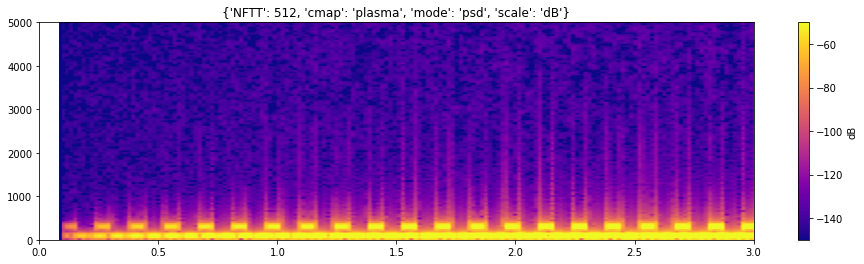

In [31]:
## With matplotlib
def plot_spectrogram(data,scale='dB',mode='psd',cmap='plasma',NFTT=512):
    """scale=['default','linear','dB']
    mode= ['default', 'psd', 'magnitude', 'angle', 'phase']
    """
    args = locals()
    args.pop('data')
    
    fig, ax = plt.subplots(figsize=(16,4))
    spec, freqs, t, m  = plt.specgram(data,scale=scale,#noverlap=128,
                                      Fs=sample_rate,NFFT=NFTT,mode=mode,
                                      cmap=cmap,)
    res = dict(spec=spec, freqs=freqs, t=t, m=m)
    plt.colorbar(label=scale)
    plt.clim(vmin=-150,vmax=-50)
    ax.set_xlim(0,3)
    ax.set_ylim(0,5000)
    ax.set_title(str(args))#f"Scale={scale}, mode={mode},cmap={cmap}")
    return res,fig,ax
res,fig,ax = plot_spectrogram(data)

In [24]:
def make_grid(just_dict=False,**kwargs):
    
    params = dict(kwargs)
    if just_dict:
        return params
    else:
        param_combs = list(itertools.product(*[*params.values()]))

        return params,param_combs

def make_kws(combs,params):#:,param_combs):
    params_list = []
    for comb in combs:
        param_dict = dict(zip(params.keys(),comb))
        params_list.append(param_dict)
    return params_list

In [25]:
## PARAMS
scales =['dB']#'linear','default',
modes = ['default', 'psd', 'magnitude']# 'angle', 'phase']
NFTTs = [128,256,512,1024]

params = make_grid(just_dict=True,scale =scales, mode = modes,NFTT = NFTTs)
params

{'scale': ['dB'],
 'mode': ['default', 'psd', 'magnitude'],
 'NFTT': [128, 256, 512, 1024]}

In [26]:
import itertools
params,combs = make_grid(just_dict=False,scale =scales, mode = modes,NFTT = NFTTs)
params,combs

({'scale': ['dB'],
  'mode': ['default', 'psd', 'magnitude'],
  'NFTT': [128, 256, 512, 1024]},
 [('dB', 'default', 128),
  ('dB', 'default', 256),
  ('dB', 'default', 512),
  ('dB', 'default', 1024),
  ('dB', 'psd', 128),
  ('dB', 'psd', 256),
  ('dB', 'psd', 512),
  ('dB', 'psd', 1024),
  ('dB', 'magnitude', 128),
  ('dB', 'magnitude', 256),
  ('dB', 'magnitude', 512),
  ('dB', 'magnitude', 1024)])

In [27]:
combs

[('dB', 'default', 128),
 ('dB', 'default', 256),
 ('dB', 'default', 512),
 ('dB', 'default', 1024),
 ('dB', 'psd', 128),
 ('dB', 'psd', 256),
 ('dB', 'psd', 512),
 ('dB', 'psd', 1024),
 ('dB', 'magnitude', 128),
 ('dB', 'magnitude', 256),
 ('dB', 'magnitude', 512),
 ('dB', 'magnitude', 1024)]

In [28]:
# test = [*params.values()]
# list(itertools.product(*test))

# list(itertools.product(*test))

In [29]:
params_kws = make_kws(combs,params)
params_kws

[{'scale': 'dB', 'mode': 'default', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 1024},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 1024},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 1024}]

Error with {'scale': 'dB', 'mode': 'default', 'NFTT': 128}
Error with {'scale': 'dB', 'mode': 'psd', 'NFTT': 128}
Error with {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 128}


/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7583: RuntimeWarning:

divide by zero encountered in log10



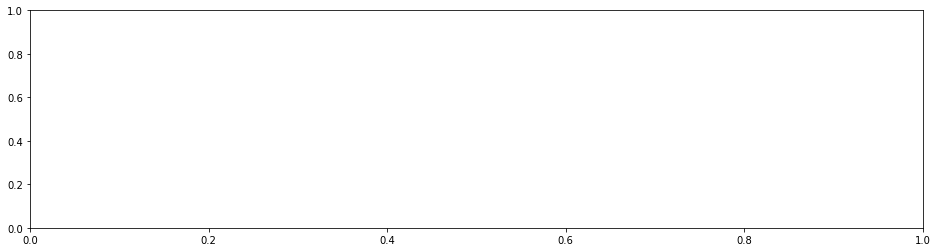

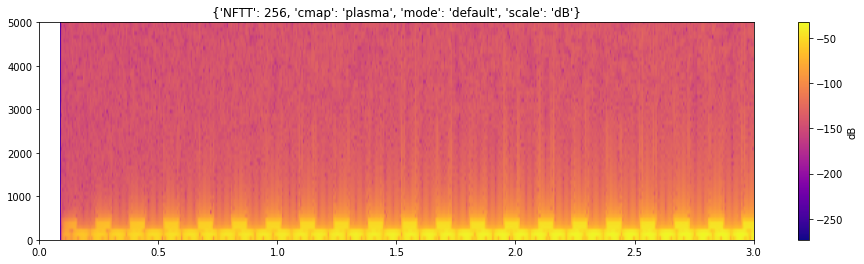

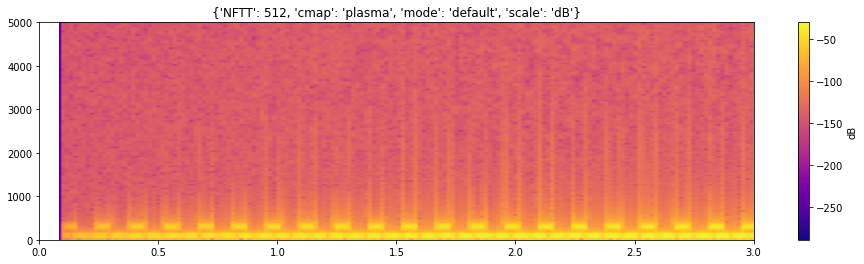

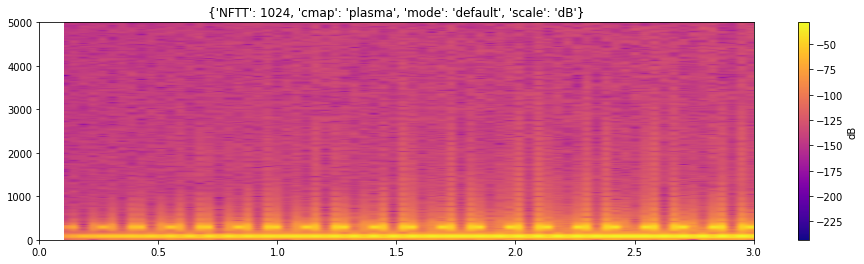

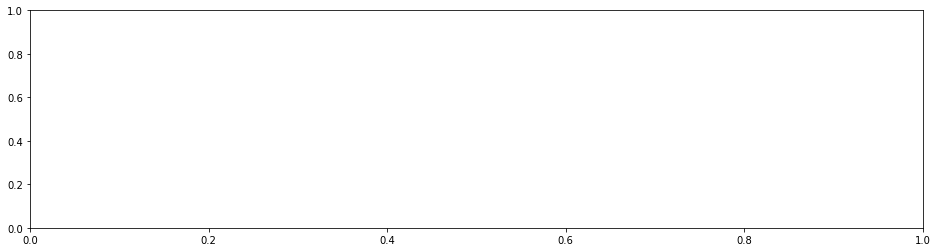

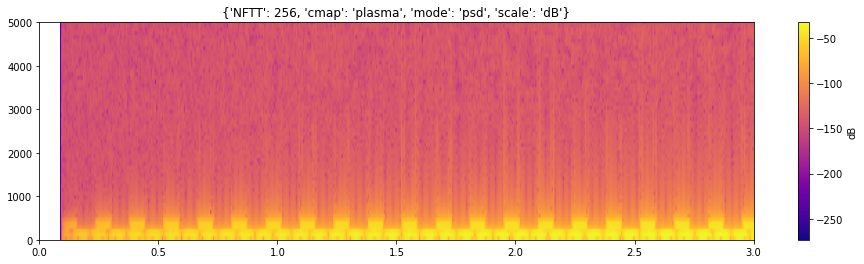

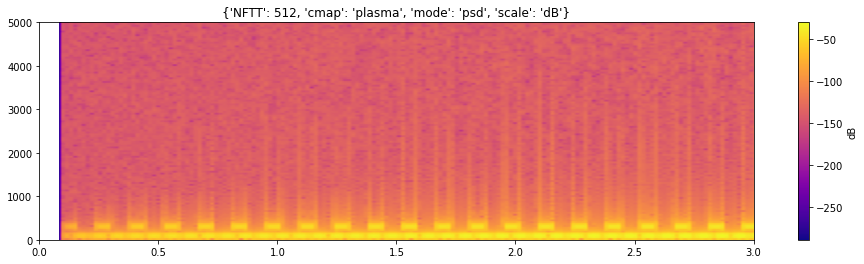

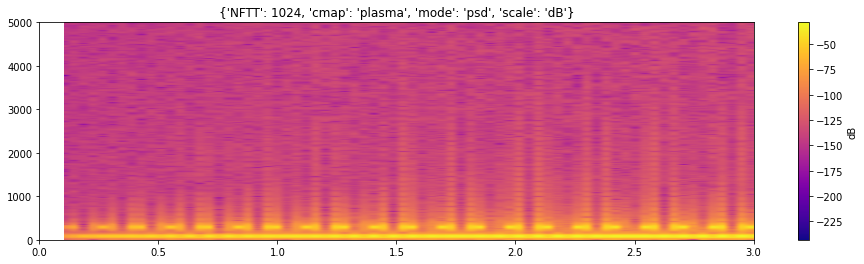

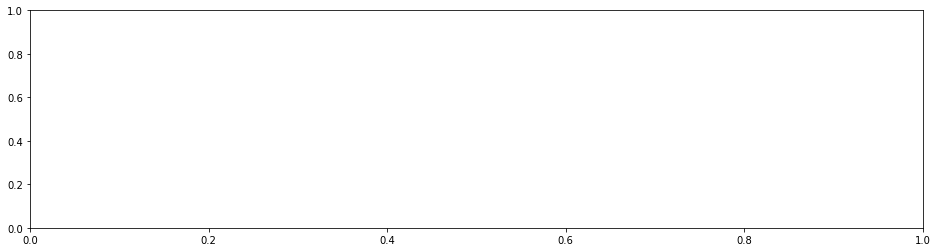

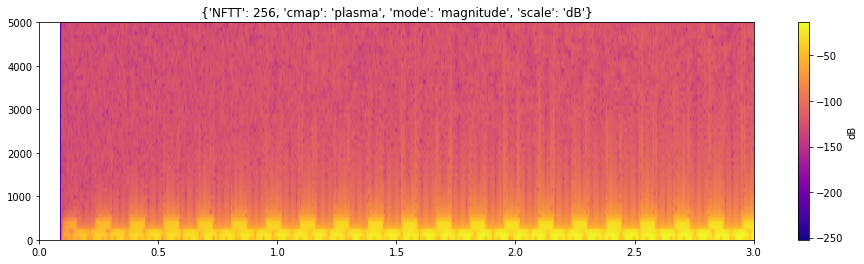

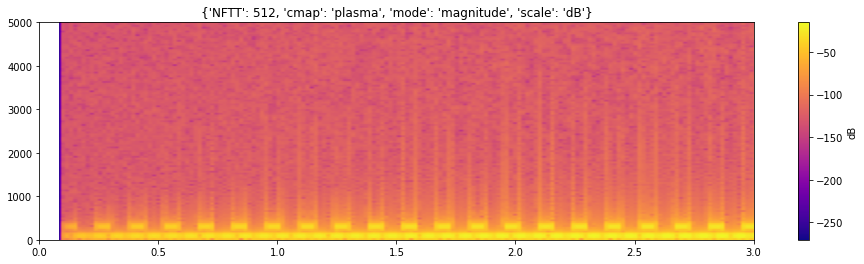

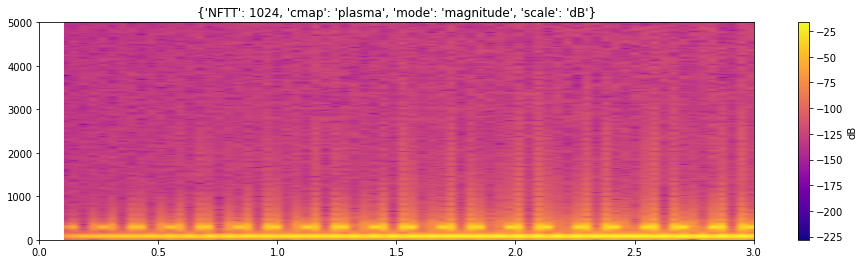

In [30]:
for kws in params_kws:
    try:
        res,fig,ax = plot_spectrogram(data,**kws)
    except Exception as e:
        print(f"Error with {kws}")

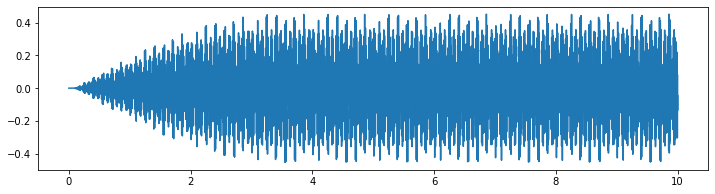

In [33]:
fig,ax=plt.subplots(figsize=(12,3))
plt.plot(sec,data)

### With Scipy

In [371]:
import scipy.signal as sig
import scipy.fft as fft

f,t,Sxx  = sig.spectrogram(data,nfft=512,fs=sample_rate,scaling='spectrum')#1000)
f.shape,t.shape,Sxx.shape

((257,), (984,), (257, 984))

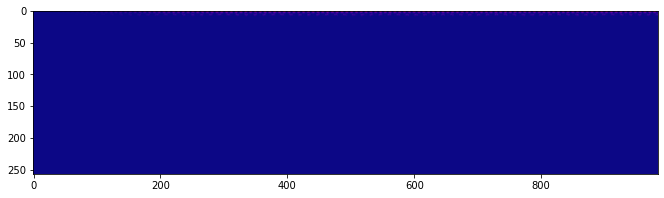

In [373]:
fig, ax = plt.subplots(figsize=(12,3))
plt.imshow(Sxx,cmap='plasma')#,vmin=Sxx.min(),vmax=Sxx.max())
# ax.set_xticklabels(t.round(3))
# ax.set_yticklabels(f.round(3))